# Step 1 - Climate Analysis and Exploration

# Import Dependencies

In [1]:
# Import Sqlalchemy
import sqlalchemy
from sqlalchemy import Column, Integer, String, Float
# Import automap base
from sqlalchemy.ext.automap import automap_base
# Import Session
from sqlalchemy.orm import Session
# Imports the method used for connecting and inspecting DB
from sqlalchemy import create_engine,inspect
from sqlalchemy.ext.declarative import declarative_base
# Import func from sqlalchemy to count
from sqlalchemy import func
# Import desc from sqlalchemy to order the records in descending order
from sqlalchemy import desc

# Import other lybraries 
import pandas as pd
import numpy as np
import datetime as dt

# Import matplotlib,pyplot and the seaborn style in matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
Base = declarative_base()

In [3]:
# Connect to your sqlite database using sqlalchemy create_engine in the case of Windows you need to add\\ to map the adress of the file
engine = create_engine("sqlite:///C:\\Users\\JESICA\\hawaii.sqlite")

In [4]:
# reflect an existing database into a new model 
Base = automap_base()
# # reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
#Retrieving tables-classes name
Base.classes.keys()

['measurement', 'station']

In [6]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
Session = Session(engine)

In [8]:
Inspect = inspect(engine)

In [9]:
#Retrieving name of columns table measurement
columns_measurement = Inspect.get_columns('measurement')
for cols in columns_measurement:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#Retrieving name of columns table station
columns_station = Inspect.get_columns('station')
for cols in columns_station:
    print(cols["name"], cols["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
#Retrieving information of Measurement table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', 0.0, 73.0)]

In [13]:
#Retrieving information of Station table
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [14]:
# Detecting the last date available in the DB
last_date= Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [17]:
# Calculating the last 12 months of data, last date - 365
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [43]:
#Inspecting the DB I relized prcp has some observation as Null 
Nulls = Session.execute("SELECT count(*) FROM Measurement WHERE prcp is Null").fetchall()
print(Nulls)

[(1447,)]


In [44]:
#Set all prcp NULL  as 0.0 in order to graph
Session.execute("Update Measurement SET prcp=0.0 WHERE prcp is NULL")

In [45]:
Session.commit()

In [46]:
Nulls = Session.execute("SELECT count(*) FROM Measurement WHERE prcp is Null").fetchall()
print(Nulls)

[(0,)]


In [27]:
# query to retrieve the date and prcp values, to dates defined above
prct_data = Session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_ago).\
    order_by(Measurement.date).all()

#save as dataframe and set index to date 
prcp_data_df = pd.DataFrame(prct_data)
prcp_data_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22


In [19]:
prcp_data_df = prcp_data_df.set_index("date")
prcp_data_df.head(20)

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


In [32]:
rain= prcp_data_df['prcp']
date = prcp_data_df['date']

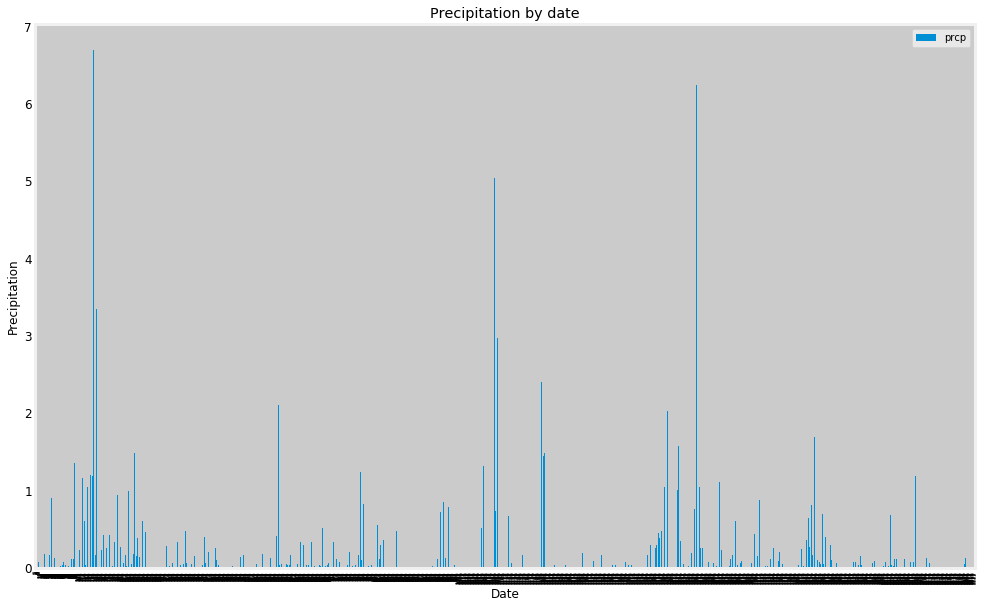

In [55]:
#Plot precipitation by date
import matplotlib.pyplot as plt
ax = prcp_data_df[['prcp','date']].plot(kind='bar', title ="Precipitation by date", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Precipitation", fontsize=12)
plt.xticks(rotation=90, fontsize=5)
plt.show()

In [39]:
from sqlalchemy import func

In [40]:
stations = Session.query(func.count(Station.station)).first()
print(f"Total number of stations: {str(stations[0])}")

Total number of stations: 9


In [41]:
# Run query to verify the measurement counts by station
engine.execute("SELECT count(station), station FROM measurement GROUP BY station ORDER BY count(station) DESC").fetchall()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [42]:
# Query to retrieve the most active stations
active_stations_descending = Session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# save the results to a dataframe
df_active_stations_descending = pd.DataFrame(data=active_stations_descending, columns=['Station', 'Count'])
df_active_stations_descending.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [43]:
# Set station with highest number of observations to a variable
station_with_most_observations = df_active_stations_descending["Station"][0]
most_observations = df_active_stations_descending["Count"][0]
print(f"Station with most observations ({most_observations}): {station_with_most_observations}")

Station with most observations (2772): USC00519281


In [44]:
Temp=Session.query(Measurement.date, Measurement.tobs).group_by(Measurement.date).\
    filter(Measurement.date <= '2017-12-31').filter(Measurement.date >= '2017-01-01').all()


In [45]:
print (Temp)

[('2017-01-01', 62.0), ('2017-01-02', 66.0), ('2017-01-03', 63.0), ('2017-01-04', 62.0), ('2017-01-05', 63.0), ('2017-01-06', 64.0), ('2017-01-07', 66.0), ('2017-01-08', 60.0), ('2017-01-09', 64.0), ('2017-01-10', 63.0), ('2017-01-11', 78.0), ('2017-01-12', 67.0), ('2017-01-13', 67.0), ('2017-01-14', 65.0), ('2017-01-15', 66.0), ('2017-01-16', 67.0), ('2017-01-17', 66.0), ('2017-01-18', 72.0), ('2017-01-19', 73.0), ('2017-01-20', 71.0), ('2017-01-21', 72.0), ('2017-01-22', 72.0), ('2017-01-23', 72.0), ('2017-01-24', 69.0), ('2017-01-25', 72.0), ('2017-01-26', 71.0), ('2017-01-27', 65.0), ('2017-01-28', 64.0), ('2017-01-29', 67.0), ('2017-01-30', 67.0), ('2017-01-31', 68.0), ('2017-02-01', 70.0), ('2017-02-02', 61.0), ('2017-02-03', 65.0), ('2017-02-04', 72.0), ('2017-02-05', 73.0), ('2017-02-06', 76.0), ('2017-02-07', 64.0), ('2017-02-08', 62.0), ('2017-02-09', 61.0), ('2017-02-10', 71.0), ('2017-02-11', 69.0), ('2017-02-12', 68.0), ('2017-02-13', 74.0), ('2017-02-14', 75.0), ('2017-02

In [46]:
Temp_stat = Session.query(Measurement.station, Measurement.date, Measurement.tobs).group_by(Measurement.date).\
    filter(Measurement.date <= '2017-12-31').filter(Measurement.date >= '2017-01-01').\
    filter(Measurement.station=="USC00519281").all()

In [47]:
print (Temp_stat)

[('USC00519281', '2017-01-01', 72.0), ('USC00519281', '2017-01-02', 70.0), ('USC00519281', '2017-01-03', 64.0), ('USC00519281', '2017-01-04', 63.0), ('USC00519281', '2017-01-05', 63.0), ('USC00519281', '2017-01-06', 62.0), ('USC00519281', '2017-01-07', 70.0), ('USC00519281', '2017-01-08', 70.0), ('USC00519281', '2017-01-09', 62.0), ('USC00519281', '2017-01-10', 62.0), ('USC00519281', '2017-01-11', 63.0), ('USC00519281', '2017-01-12', 65.0), ('USC00519281', '2017-01-13', 69.0), ('USC00519281', '2017-01-14', 77.0), ('USC00519281', '2017-01-15', 70.0), ('USC00519281', '2017-01-16', 74.0), ('USC00519281', '2017-01-17', 69.0), ('USC00519281', '2017-01-18', 72.0), ('USC00519281', '2017-01-19', 71.0), ('USC00519281', '2017-01-20', 69.0), ('USC00519281', '2017-01-21', 71.0), ('USC00519281', '2017-01-22', 71.0), ('USC00519281', '2017-01-23', 72.0), ('USC00519281', '2017-01-24', 72.0), ('USC00519281', '2017-01-25', 69.0), ('USC00519281', '2017-01-26', 70.0), ('USC00519281', '2017-01-27', 66.0), 

In [48]:
#Plot results
Tmpplot = pd.DataFrame(data=Temp_stat, columns=["station", "date", "tobs"])
Tmpplot = Tmpplot.set_index('date', drop=True)
Tmpplot = Tmpplot.drop(columns="station", axis=1)
Tmpplot.head()

,tobs
date,
2017-01-01,72.0
2017-01-02,70.0
2017-01-03,64.0
2017-01-04,63.0
2017-01-05,63.0


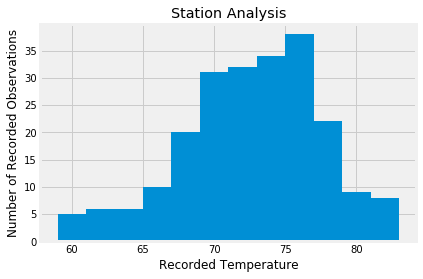

In [52]:
plt.hist(Tmpplot['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis")
plt.show()